Accuracy: 0.4150290726323051


c:\Users\mehta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mehta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mehta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Classification Report:
               precision    recall  f1-score   support

         Buy       1.00      0.00      0.00     41800
        Hold       0.00      0.00      0.00     17558
        Sell       0.42      1.00      0.59     42112

    accuracy                           0.42    101470
   macro avg       0.47      0.33      0.20    101470
weighted avg       0.58      0.42      0.24    101470



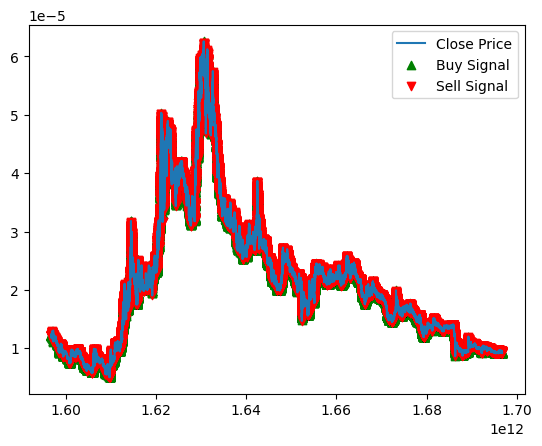

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


data = pd.read_csv('C:\\Users\\mehta\\Downloads\\qthon\\New folder\\adabtc.csv')


features = data[['open', 'close', 'high', 'low']]


data['trading_signal'] = 'Hold'
data.loc[data['close'] > data['close'].shift(1), 'trading_signal'] = 'Buy'
data.loc[data['close'] < data['close'].shift(1), 'trading_signal'] = 'Sell'


labels = data['trading_signal']


X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


X_train = X_train.dropna()
X_test = X_test.dropna()

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


predictions = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, predictions))


plt.plot(data['time'], data['close'], label='Close Price')


buy_signals = data[data['trading_signal'] == 'Buy']
plt.scatter(buy_signals['time'], buy_signals['close'], marker='^', color='g', label='Buy Signal')


sell_signals = data[data['trading_signal'] == 'Sell']
plt.scatter(sell_signals['time'], sell_signals['close'], marker='v', color='r', label='Sell Signal')

plt.legend()
plt.show()
